In [85]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns
import sqlite3

from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import cross_val_score
from sklearn.metrics import average_precision_score

import pydotplus
from IPython.display import Image

from itertools import cycle

from __future__ import division
from datetime import datetime
%matplotlib inline

In [10]:
housing = pd.read_csv("kc_house_data.csv")
housing.head()
housing = housing.T[2:]
housing = housing.T

In [13]:
housing.head()

price bedrooms bathrooms sqft_living sqft_lot floors waterfront view  \
0  221900        3         1        1180     5650      1          0    0   
1  538000        3      2.25        2570     7242      2          0    0   
2  180000        2         1         770    10000      1          0    0   
3  604000        4         3        1960     5000      1          0    0   
4  510000        3         2        1680     8080      1          0    0   

  condition grade sqft_above sqft_basement yr_built yr_renovated zipcode  \
0         3     7       1180             0     1955            0   98178   
1         3     7       2170           400     1951         1991   98125   
2         3     6        770             0     1933            0   98028   
3         5     7       1050           910     1965            0   98136   
4         3     8       1680             0     1987            0   98074   

       lat     long sqft_living15 sqft_lot15  
0  47.5112 -122.257          1340       5650  
1   47.721 -122.319          1690       7639  
2  47.7379 -122.233          2720       8062  
3  47.5208 -122.393          1360       5000  
4  47.6168 -122.045          1800       7503

In [12]:
housing.describe()

price  bedrooms  bathrooms  sqft_living  sqft_lot   floors  \
count    21613.0     21613    21613.0        21613     21613  21613.0   
unique    4028.0        13       30.0         1038      9782      6.0   
top     450000.0         3        2.5         1300      5000      1.0   
freq       172.0      9824     5380.0          138       358  10680.0   

        waterfront   view  condition  grade  sqft_above  sqft_basement  \
count        21613  21613      21613  21613       21613          21613   
unique           2      5          5     12         946            306   
top              0      0          3      7        1300              0   
freq         21450  19489      14031   8981         212          13126   

        yr_built  yr_renovated  zipcode         lat      long  sqft_living15  \
count      21613         21613    21613  21613.0000  21613.00          21613   
unique       116            70       70   5034.0000    752.00            777   
top         2014             0    98103     47.6624   -122.29           1540   
freq         559         20699      602     17.0000    116.00            197   

        sqft_lot15  
count        21613  
unique        8689  
top           5000  
freq           427

In [24]:
housing.info()
#housing.isnan()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null object
bedrooms         21613 non-null object
bathrooms        21613 non-null object
sqft_living      21613 non-null object
sqft_lot         21613 non-null object
floors           21613 non-null object
waterfront       21613 non-null object
view             21613 non-null object
condition        21613 non-null object
grade            21613 non-null object
sqft_above       21613 non-null object
sqft_basement    21613 non-null object
yr_built         21613 non-null object
yr_renovated     21613 non-null object
zipcode          21613 non-null object
lat              21613 non-null object
long             21613 non-null object
sqft_living15    21613 non-null object
sqft_lot15       21613 non-null object
dtypes: object(19)
memory usage: 3.1+ MB


In [36]:
# Converting DF to numieric
for col in housing:
    housing[col] = housing[col].convert_objects(convert_numeric=True)

/Users/anaconda/envs/dan_ty/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


In [37]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14)
memory usage: 3.1 MB


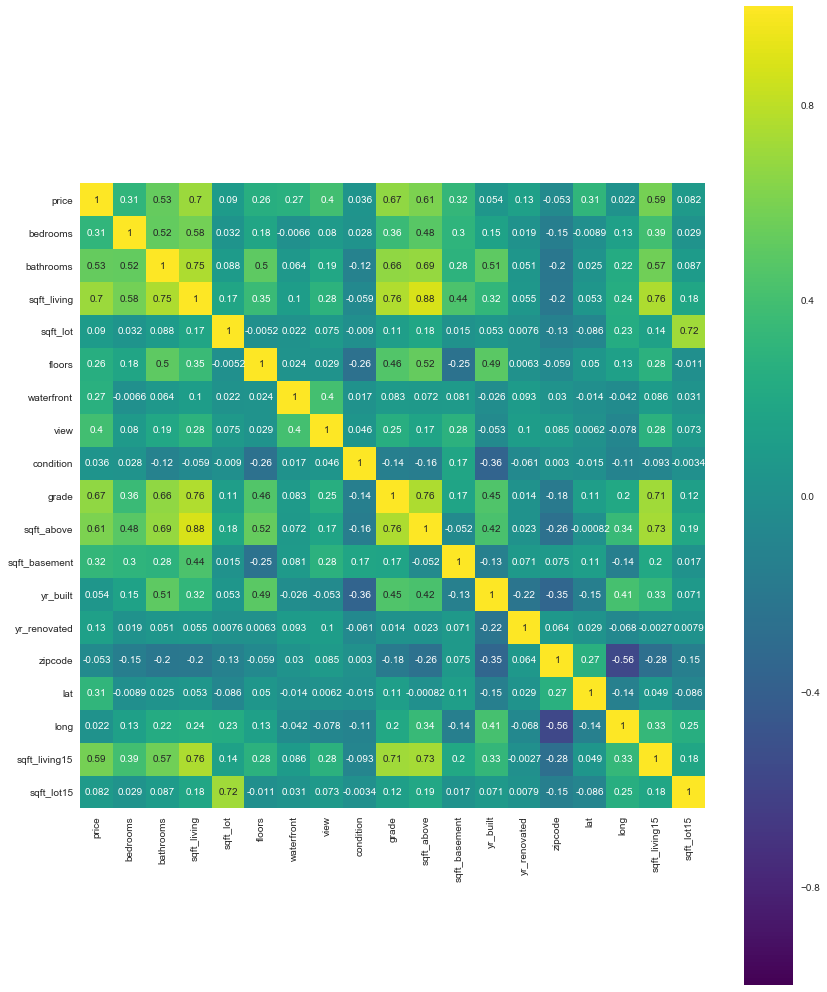

In [40]:
correlation =housing.iloc[:,:].corr()
plt.figure(figsize = (14,18))
sns.heatmap(correlation, vmax= 1, square= True, annot= True, cmap="viridis")

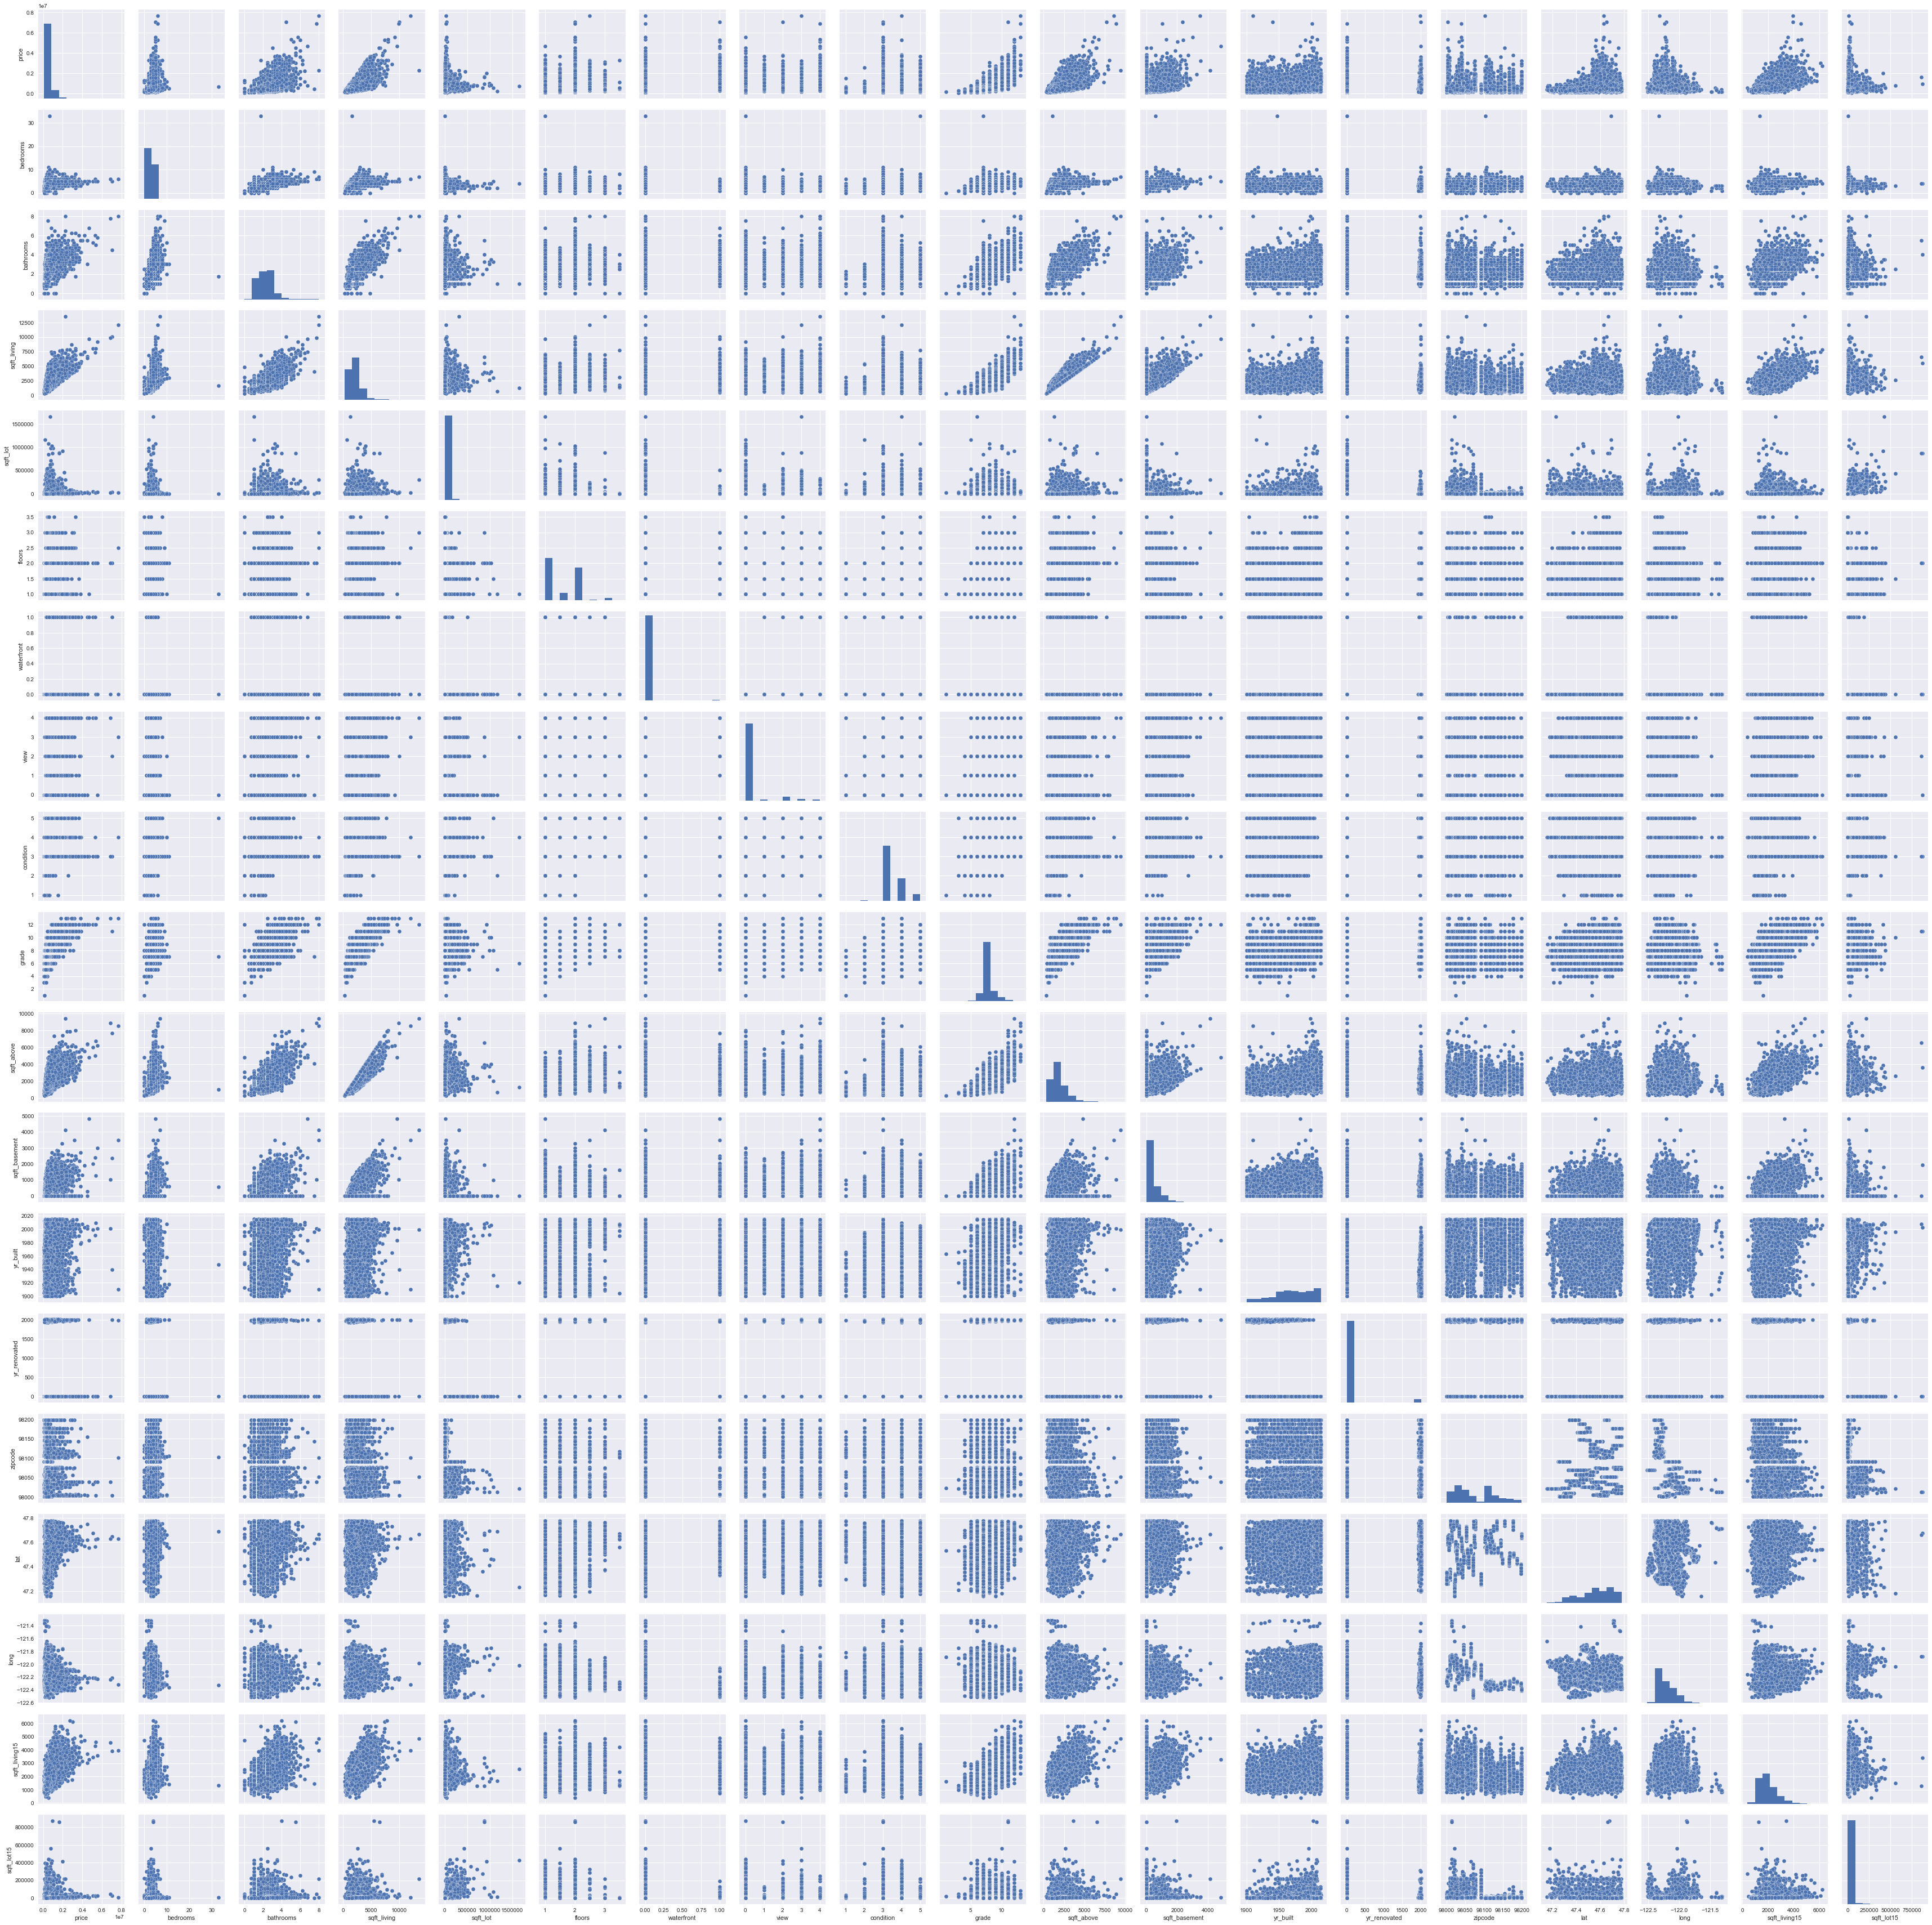

In [41]:
sns.pairplot(housing)

In [159]:
train, test = train_test_split(housing, test_size= .25, random_state=1)

train_x= train.drop(['price'], axis=1)
test_x= test.drop(['price'], axis=1)
train_y = train['price']
test_y = test['price']

## Linear Regression

In [45]:
reg_house=  LinearRegression()
reg_house.fit(train_x, train_y)
print("SCORE:")
reg_house.score(train_x, train_y)*100

SCORE:


70.477811064216837

In [53]:
print(train_x.columns)
len(train_x.columns)
reg_house.coef_

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


array([ -3.29065862e+04,   3.59429419e+04,   1.07872872e+02,
         1.16519882e-01,   1.05273733e+04,   5.69603367e+05,
         5.05209851e+04,   2.77515231e+04,   9.55987905e+04,
         6.98991149e+01,   3.79737568e+01,  -2.52931293e+03,
         2.16208641e+01,  -5.58812376e+02,   6.14299376e+05,
        -2.05688358e+05,   1.86338963e+01,  -3.42835091e-01])

In [76]:
# Why are AIC and BIC identical ? .. R / adj r?
import statsmodels.api as sm
scaler = StandardScaler()

X = sm.add_constant(train_x)
#X = scaler.fit_transform(train_x)
result = sm.OLS(train_y, X).fit()
#result= sm.OLS(train_y,X['zipcode']).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2274.
Date:                Mon, 03 Jul 2017   Prob (F-statistic):               0.00
Time:                        18:35:29   Log-Likelihood:            -2.2028e+05
No. Observations:               16209   AIC:                         4.406e+05
Df Residuals:                   16191   BIC:                         4.407e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.757e+06   3.25e+06      1.462      0.144   -1.62e+06    1.11e+07
bedrooms      -3.291e+04   2075.391    -15.856      0.000    -3.7e+04   -2.88e+04
bathrooms      3.594e+04   3614.499      9.944      0.000    2.89e+04     4.3e+04
sqft_living     107.8735      2.550     42.301      0.000     102.875     112.872
sqft_lot          0.1165      0.050      2.317      0.021       0.018       0.215
floors         1.053e+04   3999.742      2.632      0.008    2687.437    1.84e+04
waterfront     5.696e+05   1.91e+04     29.751      0.000    5.32e+05    6.07e+05
view           5.052e+04   2373.107     21.289      0.000    4.59e+04    5.52e+04
condition      2.775e+04   2604.484     10.655      0.000    2.26e+04    3.29e+04
grade           9.56e+04   2392.420     39.959      0.000    9.09e+04       1e+05
sqft_above       69.8985      2.531     27.615      0.000      64.937      74.860
sqft_basement    37.9732      2.947     12.886      0.000      32.197      43.749
yr_built      -2529.3129     80.425    -31.449      0.000   -2686.956   -2371.670
yr_renovated     21.6209      4.026      5.371      0.000      13.730      29.512
zipcode        -558.8124     36.599    -15.268      0.000    -630.551    -487.074
lat            6.143e+05   1.19e+04     51.736      0.000    5.91e+05    6.38e+05
long          -2.057e+05   1.46e+04    -14.092      0.000   -2.34e+05   -1.77e+05
sqft_living15    18.6339      3.845      4.847      0.000      11.098      26.170
sqft_lot15       -0.3428      0.079     -4.319      0.000      -0.498      -0.187
==============================================================================
Omnibus:                    11384.298   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           513982.042
Skew:                           2.850   Prob(JB):                         0.00
Kurtosis:                      29.991   Cond. No.                     9.02e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.02e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [160]:
# Baseline
lr = LinearRegression()
lr.fit(train_x,train_y)
mean_squared_error(test_y,lr.predict(test_x))

23108017456.138783

In [161]:
grid = 10**np.linspace(-2,4,10)

lr = RidgeCV(alphas = grid)
lr.fit(train_x,train_y)
mean_squared_error(test_y,lr.predict(test_x))

23120046756.61306

In [162]:
lr = LassoCV(alphas = grid)
lr.fit(train_x,train_y)
mean_squared_error(test_y,lr.predict(test_x))

/Users/anaconda/envs/dan_ty/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/anaconda/envs/dan_ty/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


23109682610.78595

In [101]:
MSE= []
house= LinearRegression()
pca = PCA()
pca_train_x= pca.fit_transform(scale(train_x))
pca_test_x= pca.fit_transform(scale(test_x))

MSE.append(np.mean(-1*cross_val_score(house,
                                    np.ones((len(train_x),1 )),
                                    train_y,
                                    cv= 10,
                                    scoring = "neg_mean_squared_error")))

for i in range(1, len(train_x.columns)):
    MSE_temp = -1*cross_val_score(house,
                                    train_x.iloc[:,:i],
                                    train_y,
                                    cv= 10,
                                    scoring = "neg_mean_squared_error")
    MSE_temp= np.mean(MSE_temp)
    MSE.append(MSE_temp)    

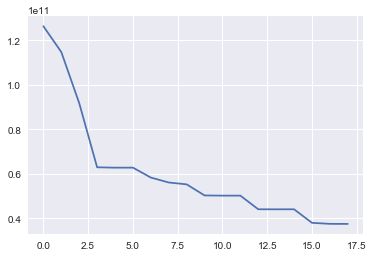

In [102]:
 # Predictors 3, 4, 9, 10, 12, 13, 15, 16, 17 seem to have little to no effect
plt.plot(MSE)
plt.show()

In [150]:
# Removing columns that seem to have litle to no effect on MSE
cols = list(housing.iloc[:,4:6])+list(housing.iloc[:,9:11]) + list(housing.iloc[:,15:18])
print(housing[cols].columns)
housing_edited = housing.drop(['waterfront', 'view', 'sqft_basement', 'yr_built', 'sqft_living15',
       'sqft_lot15'], axis=1)

Index(['waterfront', 'view', 'sqft_basement', 'yr_built', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


In [152]:
print(len(housing_edited.columns))
print(housing_edited.columns)

11
Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'condition', 'grade',
       'sqft_above', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')


In [147]:
train, test = train_test_split(housing_edited, test_size= .25, random_state=1)

train_x= train.drop(['price'], axis=1)
test_x= test.drop(['price'], axis=1)
train_y = train['price']
test_y = test['price']

In [148]:
MSE= []
house= LinearRegression()
pca = PCA()
pca_train_x= pca.fit_transform(scale(train_x))
pca_test_x= pca.fit_transform(scale(test_x))

MSE.append(np.mean(-1*cross_val_score(house,
                                    np.ones((len(train_x),1 )),
                                    train_y,
                                    cv= 10,
                                    scoring = "neg_mean_squared_error")))

for i in range(1, len(train_x.columns)):
    MSE_temp = -1*cross_val_score(house,
                                    train_x.iloc[:,:i],
                                    train_y,
                                    cv= 10,
                                    scoring = "neg_mean_squared_error")
    MSE_temp= np.mean(MSE_temp)
    MSE.append(MSE_temp)    

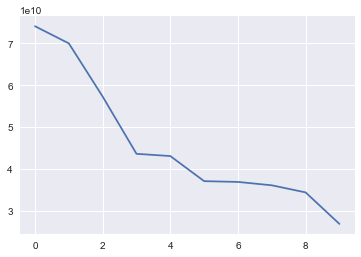

In [149]:
# A Sparser Predictor Set  .. Much Better
plt.plot(MSE)
plt.show()

In [157]:
# Baseline
lr = LinearRegression()
lr.fit(train_x,train_y)
mean_squared_error(test_y,lr.predict(test_x))

27230906182.658958

In [153]:
# Worse than Baseline
grid = 10**np.linspace(-2,4,10)

lr = RidgeCV(alphas = grid)
lr.fit(train_x,train_y)
mean_squared_error(test_y,lr.predict(test_x))

27366320109.067142

In [155]:
# Worse Again
lr = LassoCV(alphas = grid)
lr.fit(train_x,train_y)
mean_squared_error(test_y,lr.predict(test_x))

27230907275.867691

In [156]:
# However it cost about 5% on the training set R-Squared compared to complete model... 
## ?? Why aren't my Adj. R squared's different than R-squared ?
X = sm.add_constant(train_x)
#X = scaler.fit_transform(train_x)
result = sm.OLS(train_y, X).fit()
#result= sm.OLS(train_y,X['zipcode']).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                 3.673e+04
Date:                Mon, 03 Jul 2017   Prob (F-statistic):               0.00
Time:                        20:41:13   Log-Likelihood:            -2.6914e+06
No. Observations:              200663   AIC:                         5.383e+06
Df Residuals:                  200652   BIC:                         5.383e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.646e+07   6.87e+05    -96.722      0.000   -6.78e+07   -6.51e+07
bedrooms      -1.41e+04    349.040    -40.387      0.000   -1.48e+04   -1.34e+04
bathrooms    -8569.4623    816.078    -10.501      0.000   -1.02e+04   -6969.970
sqft_living    133.7859      1.103    121.287      0.000     131.624     135.948
condition     4.278e+04    520.352     82.217      0.000    4.18e+04    4.38e+04
grade         1.045e+05    584.594    178.785      0.000    1.03e+05    1.06e+05
sqft_above      30.6169      1.158     26.449      0.000      28.348      32.886
yr_renovated    51.1414      0.832     61.497      0.000      49.511      52.771
zipcode        -34.5741      8.638     -4.003      0.000     -51.504     -17.645
lat           7.101e+05   2996.318    236.984      0.000    7.04e+05    7.16e+05
long         -2.898e+05   3856.149    -75.148      0.000   -2.97e+05   -2.82e+05
==============================================================================
Omnibus:                   112521.258   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3399309.554
Skew:                           2.151   Prob(JB):                         0.00
Kurtosis:                      22.699   Cond. No.                     1.87e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""